In [2]:
import numpy as np
import pandas as pd

In [68]:
fam_ppl = ['john adams', 'benjamin franklin', 'alexander hamilton', 'john jay', 'thomas jefferson', 'james madison', 'george washington']

In [69]:
colnames = ['delegate name','First Name','Last Name','delegate_state','sign','Dollars_sum','Dollars_count','90th_sum','90th_count']

In [70]:
loan_office = pd.read_csv('Producables/Loan_Office_Certificates_Matched.csv')
loan_office.drop([0,1], inplace = True)
loan_office.columns= ['delegate name','First Name','Last Name','delegate_state','sign','Dollars_sum','Dollars_count','90th_sum','90th_count']
loan_office['Total_assets'] = loan_office['Dollars_sum'].apply(lambda x: np.float(x)) + loan_office['90th_sum'].apply(lambda x: np.float(x)/90)
loan_office_regression = loan_office
loan_office_regression['sign_coded'] = loan_office_regression['sign'].apply(lambda x: np.float(x == "yes"))
loan_office_regression[loan_office_regression['delegate name'].apply(lambda x: x.lower() in fam_ppl)]

,delegate name,First Name,Last Name,delegate_state,sign,Dollars_sum,Dollars_count,90th_sum,90th_count,Total_assets,sign_coded
25,Benjamin Franklin,Benjamin,Franklin,Constitution,yes,8100,27,8100.0,27,8190.000000,1.0
96,George Washington,George,Washington,Constitution,yes,82000,21,4746.21646,21,82052.735738,1.0
229,John Jay,John,Jay,NY,yes,8900,15,8719.3542,15,8996.881713,1.0


In [71]:
loan_office_regression.sort_values('Total_assets', ascending = False).head(10)

,delegate name,First Name,Last Name,delegate_state,sign,Dollars_sum,Dollars_count,90th_sum,90th_count,Total_assets,sign_coded
357,Robert Morris,Robert,Morris,Constitution,yes,405700,309,67275.16728999997,309,406447.501859,1.0
269,John Stevens,John,Stevens,NJ,yes,399300,344,27727.495403000015,344,399608.083282,1.0
163,Jeremiah Wadsworth,Jeremiah,Wadsworth,CT,yes,303300,369,35498.52977999993,369,303694.428109,1.0
487,William Smith,William,Smith,SC,yes,212200,381,29479.097219999985,381,212527.545525,1.0
353,Robert Coleman,Robert,Coleman,PA,yes,206200,306,5155.001389999999,306,206257.277793,1.0
265,John Skinner,John,Skinner,NC,yes,203400,313,5718.859901000001,313,203463.542888,1.0
199,John Davis,John,Davis,MA,yes,134900,196,5778.647147999995,196,134964.207191,1.0
69,Davis John,Davis,John,RI,yes,134200,194,5696.338807999995,194,134263.292653,1.0
202,John Dunlap,John,Dunlap,MA,yes,112100,72,12869.974449000001,72,112242.999716,1.0
495,Williams John,Williams,John,RI,no,107800,176,9740.07501999999,176,107908.223056,0.0


In [76]:
state = pd.read_csv('Producables/State_Certificates_Matched.csv')
state.drop([0,1], inplace = True)
state.columns= ['delegate name','First Name','Last Name','delegate_state','sign','Dollars_sum','Dollars_count','90th_sum','90th_count']
state['Total_assets'] = state['Dollars_sum'].apply(lambda x: np.float(x)) + state['90th_sum'].apply(lambda x: np.float(x)/90 if x != '22/8' else 2.75/90)
state_regression = state
state_regression['sign_coded'] = state_regression['sign'].apply(lambda x: np.float(x == "yes"))
state_regression[state_regression['delegate name'].apply(lambda x: x.lower() in fam_ppl)]

,delegate name,First Name,Last Name,delegate_state,sign,Dollars_sum,Dollars_count,90th_sum,90th_count,Total_assets,sign_coded
5,Alexander Hamilton,Alexander,Hamilton,Constitution,yes,160.0,1,0,0,160.000000,1.0
225,John Jay,John,Jay,NY,yes,1.0,1,22/8,1,1.030556,1.0


In [58]:
loan_office_regression.to_csv("temp.csv")

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [59]:
x = np.log(np.array(loan_office_regression['Total_assets'].tolist())).reshape(-1, 1)
y = loan_office_regression['sign_coded']
model.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Text(0, 0.5, 'Vote')

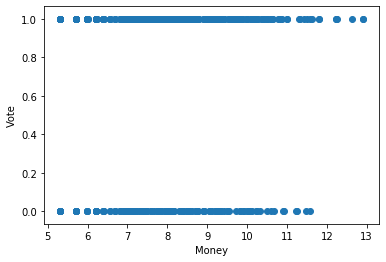

In [63]:
#matplotlib scatter funcion w/ logistic regression
plt.scatter(x,y)
plt.xlabel("Money")
plt.ylabel("Vote")

In [61]:
model.intercept_

array([0.33052195])

In [62]:
model.coef_

array([[0.0612712]])